<a href="https://colab.research.google.com/github/hAriasm/AlgoritmoOrdenamiento/blob/main/VA_tarea01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROCESAMIENTO DE IMÁGENES**




In [ ]:
import numpy as np
from PIL import Image  , ImageEnhance
import matplotlib.pylab as plt
from skimage import io
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display

#import pandas as pd


#PREGUNTA 01: Ecualización

Transformaciones del histograma:

* Definir histograma
* Calcular histograma
* Retornar histograma
* Función ... de histograma
* Normalizar histograma
* Distribuir máximo y mínimo
* Obtener la ecualización

Objetivo: Realizar la función ecualizar

**Opción 1**

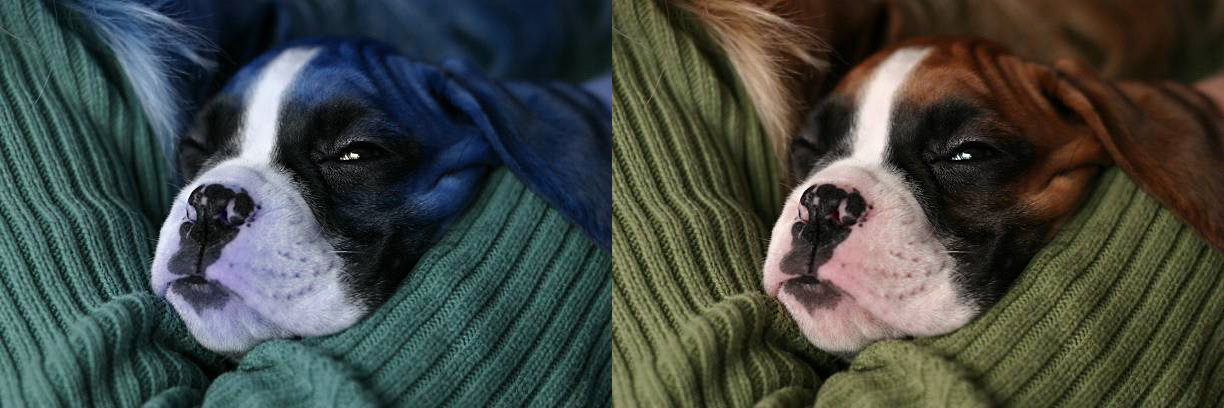

In [ ]:

url = "https://media.gettyimages.com/id/108196586/es/foto/boxeador-cachorro-welpe-primer-plano.jpg?s=612x612&w=0&k=20&c=bd2nDF3x7fgEHvcgmBR7ztCNZlFBCIKMwVbW5in2N_s="

#url =  "https://raw.githubusercontent.com/amirmohammadraei/Histogram-Equalization/main/samples/image.png"

image = io.imread(url) 
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((image, image_2))
cv2_imshow(final_frame)
print('\n')

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(image_2.dtype)
# Check the height of image 
print(image_2.shape[0])
# Check the width of image 
print(image_2.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
408
612
3


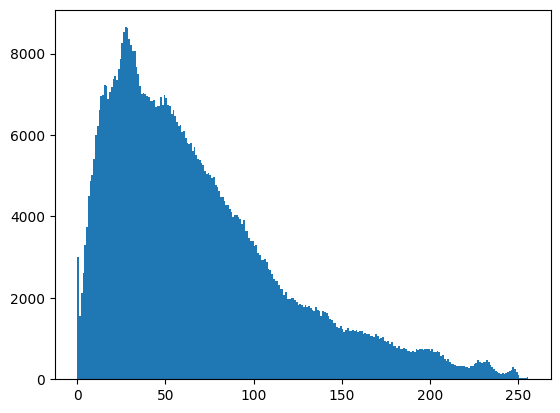

In [ ]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

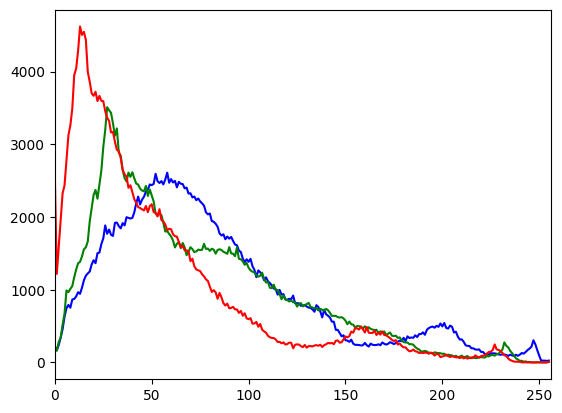

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

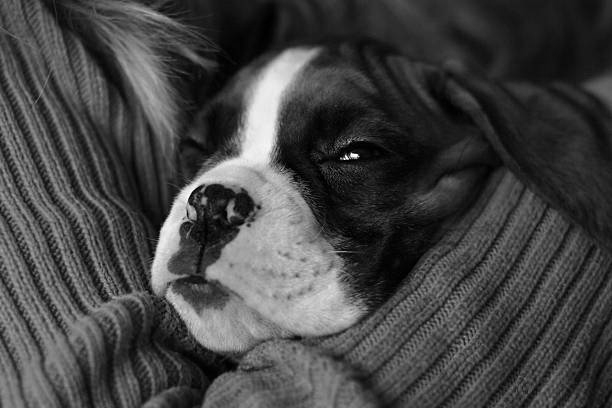

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

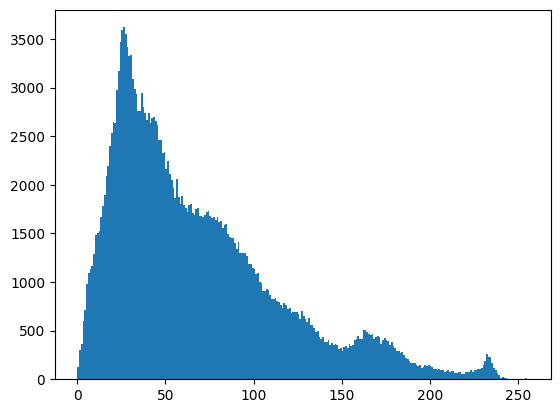

In [ ]:
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

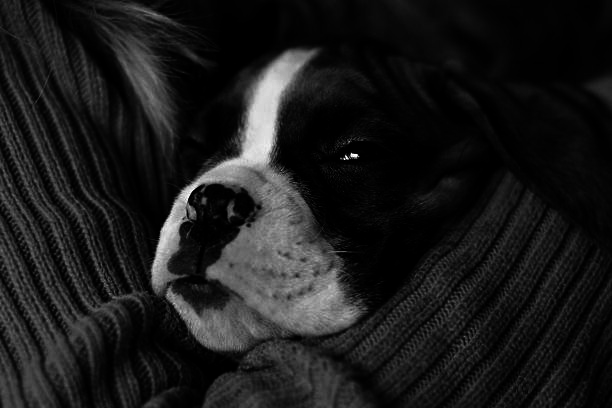

In [ ]:
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

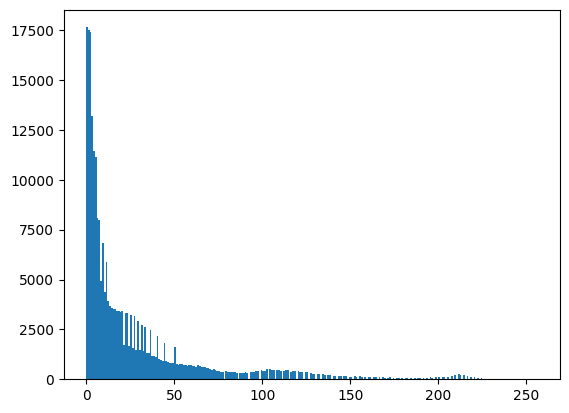

In [ ]:
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

In [ ]:
def equalize_hist(img): 
  hist, bins = np.histogram(im4, bins=256, range=(0, 256))

  
  #total_px = np.sum(hist)
  
  #result = np.zeros(256)
  #cum = hist[0]
  
  #for i in range(1, 254): 
  #  result[i] = cum * (255 / total_px)
  #  cum = cum + hist[i]
  
  #result[255] = 255

  prob = hist / np.sum(hist)
  cdf = np.cumsum(prob)
  new_intensity = np.uint8(255 * cdf)
  result  = new_intensity[img]


  return result

im5 = equalize_hist(im4)
plt.hist(im5,bins = 256, range = [0, 256])
plt.show()

IndexError: ignored

In [ ]:
def imhist(X):
  (N,M) = X. shape
  n = 256
  h = np.zeros((256,)) 
  for i in range(N):
    for j in range(M):
      x=X[i,j]
      h[x] = h[x]+1
  plt.figure(figsize=(60,9))
  plt.bar(range(n),h[0:n])
  plt.show()

In [ ]:
def hist_forceuni(img):
  img_x = img.copy()
  img_x = 255 * ((img_x - img_x.min()) / (img_x.max() - img_x.min()))
  
  n, m = img_x.shape
  y = np.zeros((n * m, 1), dtype=np.uint8)
  j = np.argsort(img_x.flatten())
  z = np.zeros((n * m, 1), dtype=np.uint8)
  d = np.int(np.fix((n * m / 256) + 0.5))
  
  for i in range (255):
    z[i * d:(i + 1) * d] = i * np.ones((d, 1))

  z[255 * d:n * m] = 255 * np.ones((n * m - 255 * d, 1))

  y[j] = z
  y = y.reshape(n, m)

  return y

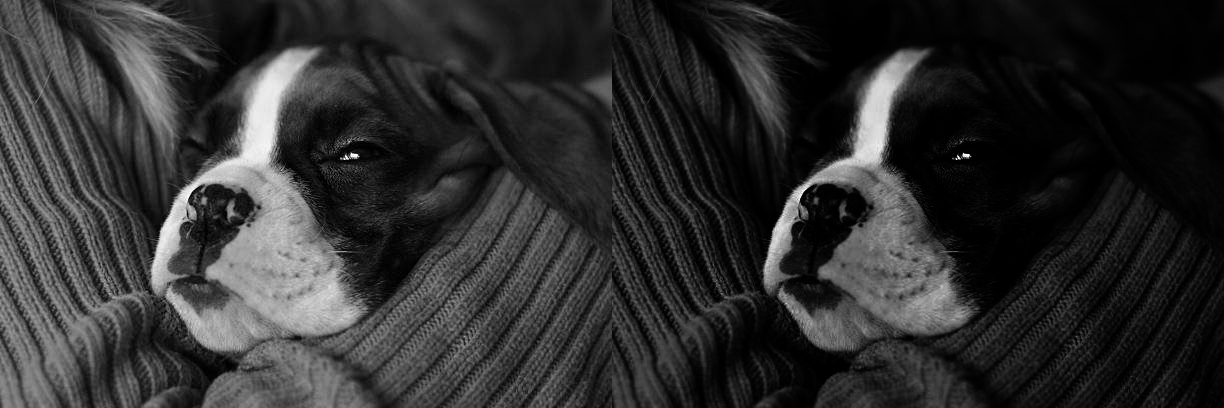

In [ ]:
im4 = np.ma.filled(im4,0).astype('uint8')
final_frame = cv.hconcat((gray_image, im4))
cv2_imshow(final_frame)

<ipython-input-33-3ea8c9388e0c>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  d = np.int(np.fix((n * m / 256) + 0.5))


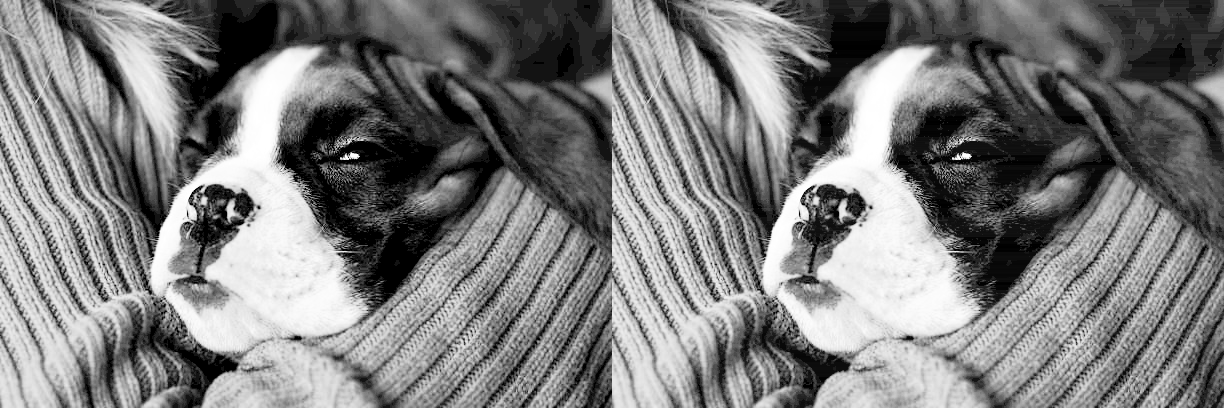

In [ ]:
im5 = cv.equalizeHist(im4)
imX = hist_forceuni(im4)

final_frame = cv.hconcat((im5, imX))
cv2_imshow(final_frame)

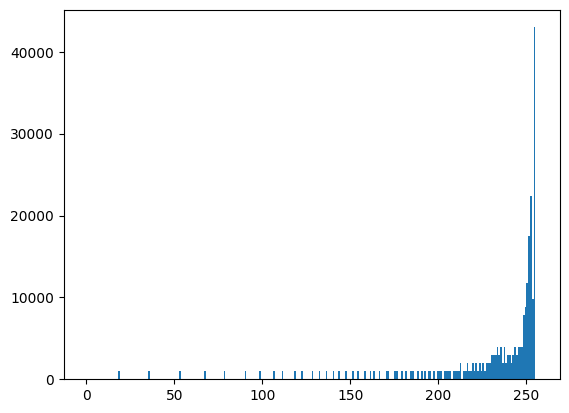

In [ ]:
def equalize_hist(img): 
  hist, bins = np.histogram(im4, bins=256, range=(0, 256))

  prob = hist / np.sum(hist)
  cdf = np.cumsum(prob)
  new_intensity = np.uint8(255 * cdf)
  result  = new_intensity[img.astype('uint8')]


  return result

im5 = equalize_hist(imX)
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

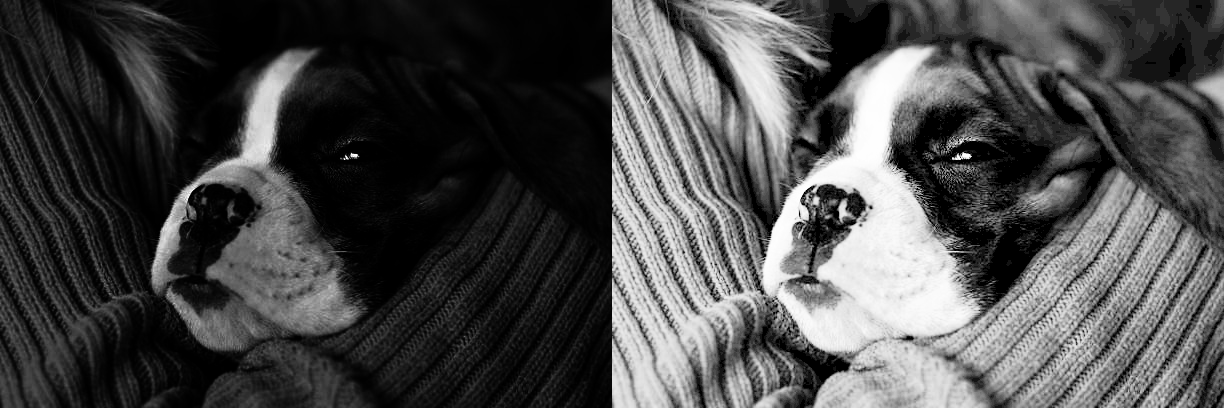

In [ ]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
im5 = np.ma.filled(im5,0).astype('uint8')
final_frame = cv.hconcat((im4, im5))
cv2_imshow(final_frame)

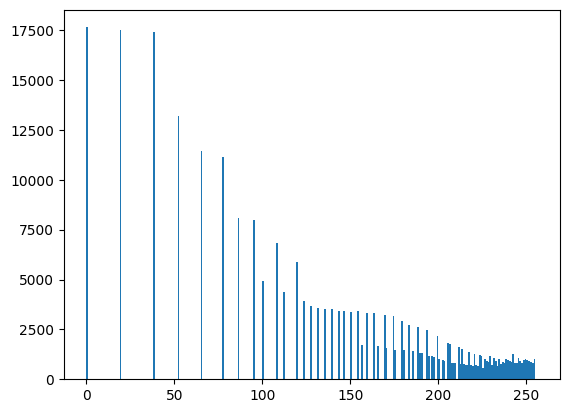

In [ ]:
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

#PREGUNTA 02: Operaciones artiméticas


* Adicion
* Sutracción
* Multiplicación
* División

Objetivo: Realizar la función que realice las operaciones aritméticas

Input: img 1, img 2  --> img resultante

#PREGUNTA 03: Filtros y convoluciones

Objetivo: Realizar la función que realice las operaciones de convolución


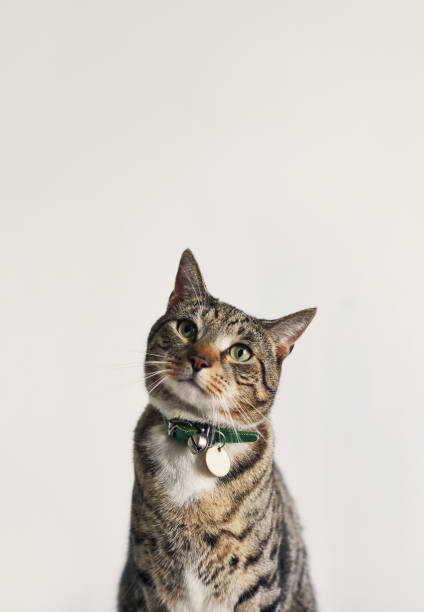

In [ ]:
url = "https://media.gettyimages.com/id/1248313892/es/foto/portrait-of-a-tabby-cat.jpg?s=612x612&w=0&k=20&c=BTF2i0jwJkSKFlDsjnZxfMcvna02-gt7IA6DAFZquFQ="

image = io.imread(url) 
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_2)
print('\n')

(614, 426, 3)
(616, 428, 3)
(618, 430, 3)


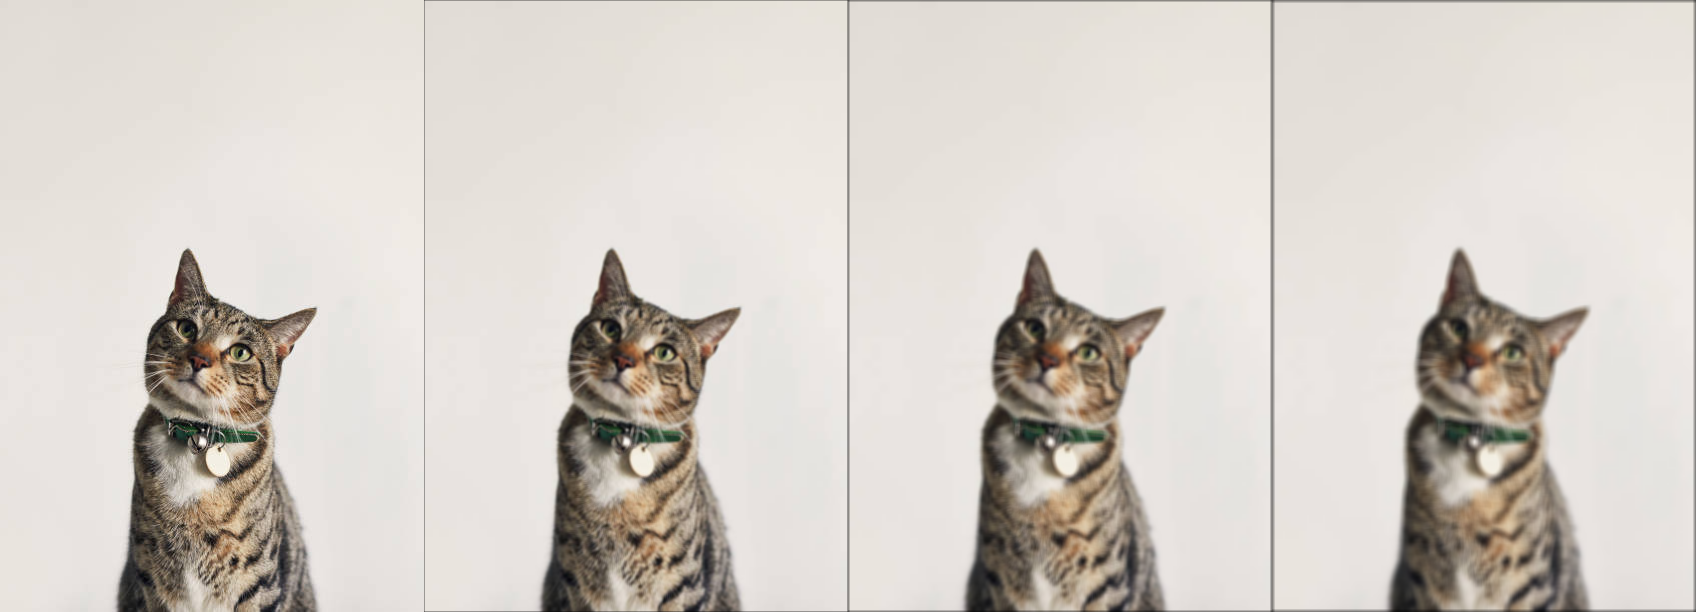

In [ ]:
def convolve(image, kernel):
    # Obtener el tamaño de la imagen y el kernel
    i_rows, i_cols, _ = image.shape
    k_rows, k_cols = kernel.shape
    
    # Calcular la cantidad de vecinos necesario
    p_rows = k_rows // 2
    p_cols = k_cols // 2
    
    #print(p_rows, p_cols)
    
    # Crear una imagen de zeros con el padding
    padded_image = np.zeros((i_rows + 2*p_rows, i_cols + 2*p_cols, 3))
    #print(padded_image.shape)
    padded_image[p_rows:-p_rows, p_cols:-p_cols, :] = image
    
    # Crear la imagen resultado
    result = np.zeros((i_rows, i_cols, 3))
    
    # Realizar la convolución
    for row in range(i_rows):
        for col in range(i_cols):
            for channel in range(3):
                result[row, col, channel] = np.mean(padded_image[row:row+k_rows, col:col+k_cols, channel])
                
    return result.astype(np.uint8)


# Kernel de 3x3
kernel3x3 = np.ones((3, 3)) / 9
img_3x3 = convolve(image_2, kernel3x3)


# Kernel de 5x5
kernel5x5 = np.ones((5, 5)) / 25
img_5x5 = convolve(image_2, kernel5x5)

# Kernel de 7x7
kernel7x7 = np.ones((7, 7)) / 49
img_7x7 = convolve(image_2, kernel7x7)


final_frame = cv.hconcat((image_2, img_3x3, img_5x5, img_7x7))
cv2_imshow(final_frame)
print('\n')

#PREGUNTA 04: Filtro de la mediana

Objetivo: Realizar la función del filtro de la mediana

#PREGUNTA 05: Interpolación bilineal

Objetivo: Realizar la función de interpolacion bilineal

opcional: interpolación bicúbica

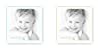

In [2]:
url = "https://m.media-amazon.com/images/I/416oSxzgpXL._AC_US40_AA50_.jpg"
image = io.imread(url)
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((image, image_2))
cv2_imshow(final_frame)
print('\n')

uint8
499
466
3


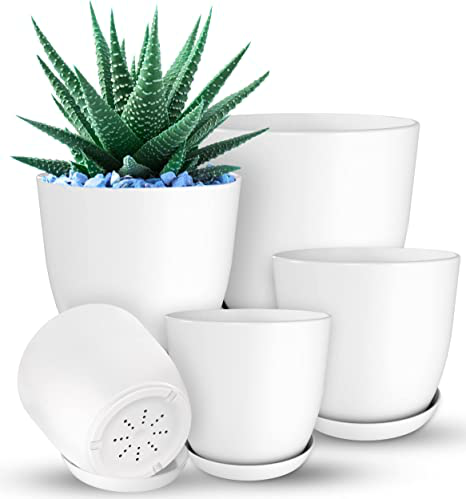

In [ ]:
def bilinear_interpolation(imagen, nuevo_ancho, nuevo_alto):
    alto, ancho, canales = imagen.shape
    arr = np.zeros((nuevo_alto, nuevo_ancho, canales), dtype=np.uint8)

    for y in range(nuevo_alto):
        for x in range(nuevo_ancho):
            coord_x = (x/ancho)*(ancho-1)
            coord_y = (y/alto)*(alto-1)

            x1 = int(coord_x)
            y1 = int(coord_y)
            x2 = x1 + 1
            y2 = y1 + 1

            if x2 >= ancho or y2 >= alto:
                continue  # saltar esta iteración si x2 o y2 están fuera de rango

            valor = np.zeros((1, 1, canales), dtype=np.uint8)

            for c in range(canales):
                if x2-x1 != 0 and y2-y1 != 0:
                    valor[0,0,c] = int(
                        (1/(x2-x1)/(y2-y1)) * (
                            arr[y1,x1,c]*(x2-coord_x)*(y2-coord_y) +
                            arr[y1,x2,c]*(coord_x-x1)*(y2-coord_y) +
                            arr[y2,x1,c]*(x2-coord_x)*(coord_y-y1) +
                            arr[y2,x2,c]*(coord_x-x1)*(coord_y-y1)
                        )
                    )
                else:
                    valor[0,0,c] = 0  # valor predeterminado en caso de división por cero

            arr[y,x,:] = valor

    return Image.fromarray(arr)

def apply_brightness_contrast(input_img, brightness=0, contrast=0):
    """
    Aplica brillo y contraste a una imagen de entrada.
    
    :param input_img: Imagen de entrada en formato de arreglo Numpy.
    :param brightness: Valor de brillo a aplicar (-255 a 255). Valor predeterminado: 0 (sin cambio).
    :param contrast: Valor de contraste a aplicar (-127 a 127). Valor predeterminado: 0 (sin cambio).
    :return: Imagen transformada con el brillo y contraste aplicados.
    """
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            max_val = 255
        else:
            shadow = 0
            max_val = 255 + brightness
        al_pha = (max_val - shadow) / 255
        ga_mma = shadow

        # Aplicar la transformación de brillo
        lut = np.arange(0, 256).astype('float32')
        lut = al_pha * (lut - ga_mma) + ga_mma
        lut = np.clip(lut, 0, 255).astype('uint8')
        input_img = cv.LUT(input_img, lut)

    if contrast != 0:
        f = 131 * (contrast + 127) / (127 * (131 - contrast))
        al_pha = f
        ga_mma = 127 * (1 - f)

        # Aplicar la transformación de contraste
        lut = np.arange(0, 256).astype('float32')
        lut = al_pha * (lut - ga_mma) + ga_mma
        lut = np.clip(lut, 0, 255).astype('uint8')
        input_img = cv.LUT(input_img, lut)

    return input_img



# Ejemplo de uso
url = "https://m.media-amazon.com/images/I/71ISeaGCW1L._AC_SX466_.jpg"
imagen = io.imread(url)
np_imageI = np.asarray(imagen)
 # Check the image matrix data type (could know the bit depth of the image)
print(np_imageI.dtype)
# Check the height of image 
print(np_imageI.shape[0])
# Check the width of image 
print(np_imageI.shape[1])
# Check the number of channels of the image
print(np_imageI.shape[2])
cv2_imshow(imagen)
print('\n')

nueva_imagen = bilinear_interpolation(imagen, 800, 1200)
brillo = ImageEnhance.Brightness(nueva_imagen)
nueva_imagen = brillo.enhance(1.5)

contraste = ImageEnhance.Contrast(nueva_imagen)
nueva_imagen = contraste.enhance(1.25)

np_image = np.asarray(nueva_imagen)
 # Check the image matrix data type (could know the bit depth of the image)
print(np_image.dtype)
# Check the height of image 
print(np_image.shape[0])
# Check the width of image 
print(np_image.shape[1])
# Check the number of channels of the image
print(np_image.shape[2])
np_image = np.array(nueva_imagen)
nueva_imagen = apply_brightness_contrast(np_image, brightness=20, contrast=30)

plt.imshow(nueva_imagen)
plt.show()



print('\n')